# Here to write what we plan to do and steps for doing it.

## Clustering

We suppose that people in for ex in America do not have any effect on people in for example EE (Hypothesis)

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Input data
df = pd.read_csv("C:\\Users\\Adrian\\Documents\\Aarhus University\\Data Mining\\Gowalla Data\\Gowalla_totalCheckins.txt", sep = "\t", header = None)
# read csv is still using local file path.
headers = ["user_id", "checkin_time", "latitude", "longitude", "location_id"]
df.columns = headers
print(df.head())

   user_id          checkin_time   latitude  longitude  location_id
0        0  2010-10-19T23:55:27Z  30.235909 -97.795140        22847
1        0  2010-10-18T22:17:43Z  30.269103 -97.749395       420315
2        0  2010-10-17T23:42:03Z  30.255731 -97.763386       316637
3        0  2010-10-17T19:26:05Z  30.263418 -97.757597        16516
4        0  2010-10-16T18:50:42Z  30.274292 -97.740523      5535878


### Data Preprocessing

Text(0, 0.5, 'Longitude')

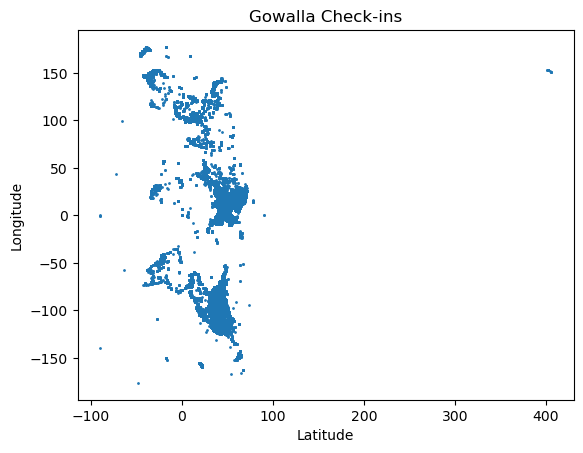

In [ ]:
plt.scatter(df["longitude"], df["latitude"], s=1)
plt.title("Gowalla Check-ins")
plt.xlabel("Longitude")
plt.ylabel("Latitude")